In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os 
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [16]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: my_first_submission.csv
  File: EDA_train_observed_a.html
  File: .DS_Store
  File: EDA_test_estimated_a.html
  File: test.csv
  File: EDA_train_estimated_c.html
  File: EDA_train_estimated_b.html
  File: Readme.md
  File: EDA_test_estimated_c.html
  File: EDA_train_estimated_a.html
  File: EDA_test_estimated_b.html
  File: EDA_train_observed_c.html
  File: sample_submission.csv
  File: read_files.ipynb
  File: EDA_train_observed_b.html
Directory: ./A
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./.ipynb_checkpoints
  File: read_files-checkpoint.ipynb
Directory: ./C
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./B
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet


<Axes: xlabel='time'>

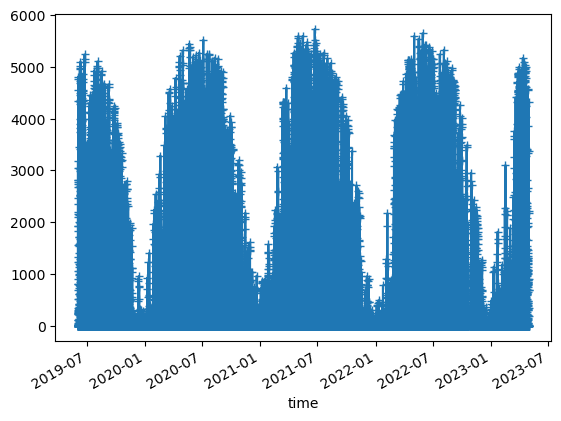

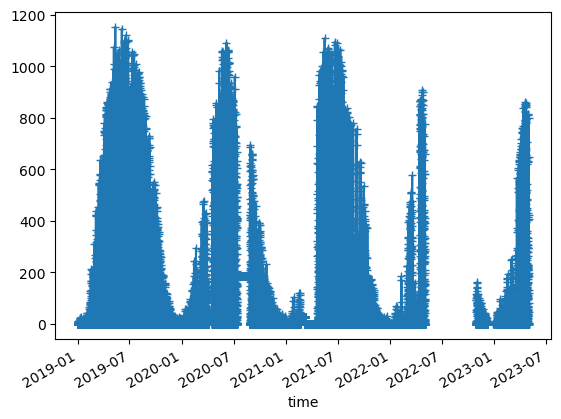

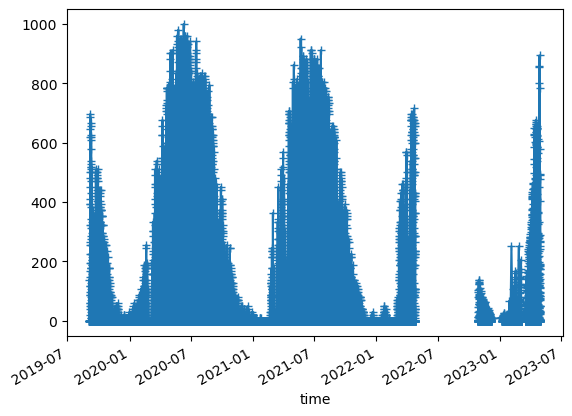

In [424]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

plt.figure()
(train_a['pv_measurement']).plot(marker = '+')
plt.figure()
train_b['pv_measurement'].plot(marker = '+')
plt.figure()
train_c['pv_measurement'].plot(marker = '+')


In [365]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [366]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

X_train_observed_a

,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
0,2019-06-02 22:00:00,7.7,1.230,1744.900024,0.0,0.0,1744.900024,0.0,280.299988,0.0,0.0,0.0,0.0,98.699997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.799988,0.0,0.0,994.200012,1000.299988,0.0,0.0,73.099998,1006.299988,NaN,0.0,0.0,-0.0,0.1,342.834015,-3.202000,0.0,285.899994,100.0,39640.101562,3.7,-3.6,-0.8,-0.0
1,2019-06-02 22:15:00,7.7,1.229,1734.000000,0.0,0.0,1734.000000,0.0,280.299988,0.0,0.0,0.0,0.0,99.000000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.500000,0.0,0.0,993.900024,999.900024,0.0,0.0,72.199997,1006.000000,NaN,0.0,0.0,-0.0,0.2,346.294006,-3.650000,0.0,286.100006,100.0,40123.898438,3.6,-3.6,-0.6,-0.0
2,2019-06-02 22:30:00,7.7,1.228,1723.500000,0.0,0.0,1723.500000,0.0,280.299988,0.0,0.0,0.0,0.0,99.199997,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1006.099976,0.0,0.0,993.599976,999.599976,0.0,0.0,71.199997,1005.599976,NaN,0.0,0.0,-0.0,0.2,349.768005,-3.998000,0.0,286.299988,100.0,40628.300781,3.6,-3.6,-0.4,-0.0
3,2019-06-02 22:45:00,7.7,1.226,1713.400024,0.0,0.0,1713.400024,0.0,280.299988,0.0,0.0,0.0,0.0,99.400002,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.799988,0.0,0.0,993.299988,999.299988,0.0,0.0,70.199997,1005.299988,NaN,0.0,0.0,-0.0,0.2,353.251007,-4.247000,0.0,286.600006,100.0,41153.601562,3.5,-3.5,-0.2,-0.0
4,2019-06-02 23:00:00,7.7,1.225,1703.599976,0.0,0.0,1703.599976,0.0,280.299988,0.0,0.0,0.0,0.0,99.599998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1005.500000,0.0,0.0,993.000000,999.000000,0.0,0.0,69.199997,1005.000000,NaN,0.0,0.0,-0.0,0.2,356.742004,-4.393000,0.0,286.799988,100.0,41699.898438,3.5,-3.5,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118664,2022-10-21 00:00:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.800000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.400024,0.0,0.0,1005.500000,1011.799988,0.0,0.0,82.699997,1018.099976,NaN,0.0,0.0,-0.0,0.0,16.612000,-36.306000,0.0,276.899994,2.8,25791.000000,1.3,-0.4,1.2,-0.0
118665,2022-10-21 00:15:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,2.300000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.299988,0.0,0.0,1005.400024,1011.700012,0.0,0.0,83.099998,1018.000000,NaN,0.0,0.0,-0.0,0.0,21.132999,-35.762001,0.0,276.799988,2.3,28560.599609,1.4,-0.6,1.2,-0.0
118666,2022-10-21 00:30:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.700012,0.0,0.0,0.0,0.0,1.700000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.200012,0.0,0.0,1005.299988,1011.599976,0.0,0.0,83.400002,1017.900024,NaN,0.0,0.0,-0.0,0.0,25.594000,-35.095001,0.0,276.600006,1.7,31317.800781,1.4,-0.8,1.2,-0.0
118667,2022-10-21 00:45:00,5.0,1.292,NaN,0.0,0.0,NaN,0.0,273.600006,0.0,0.0,0.0,0.0,1.100000,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1018.000000,0.0,0.0,1005.099976,1011.400024,0.0,0.0,83.800003,1017.700012,NaN,0.0,0.0,-0.0,0.0,29.988001,-34.311001,0.0,276.500000,1.1,34062.601562,1.5,-1.0,1.1,-0.0


In [371]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

np.unique(X_test_estimated_b['precip_type_5min:idx'])

array([0., 1.], dtype=float32)

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

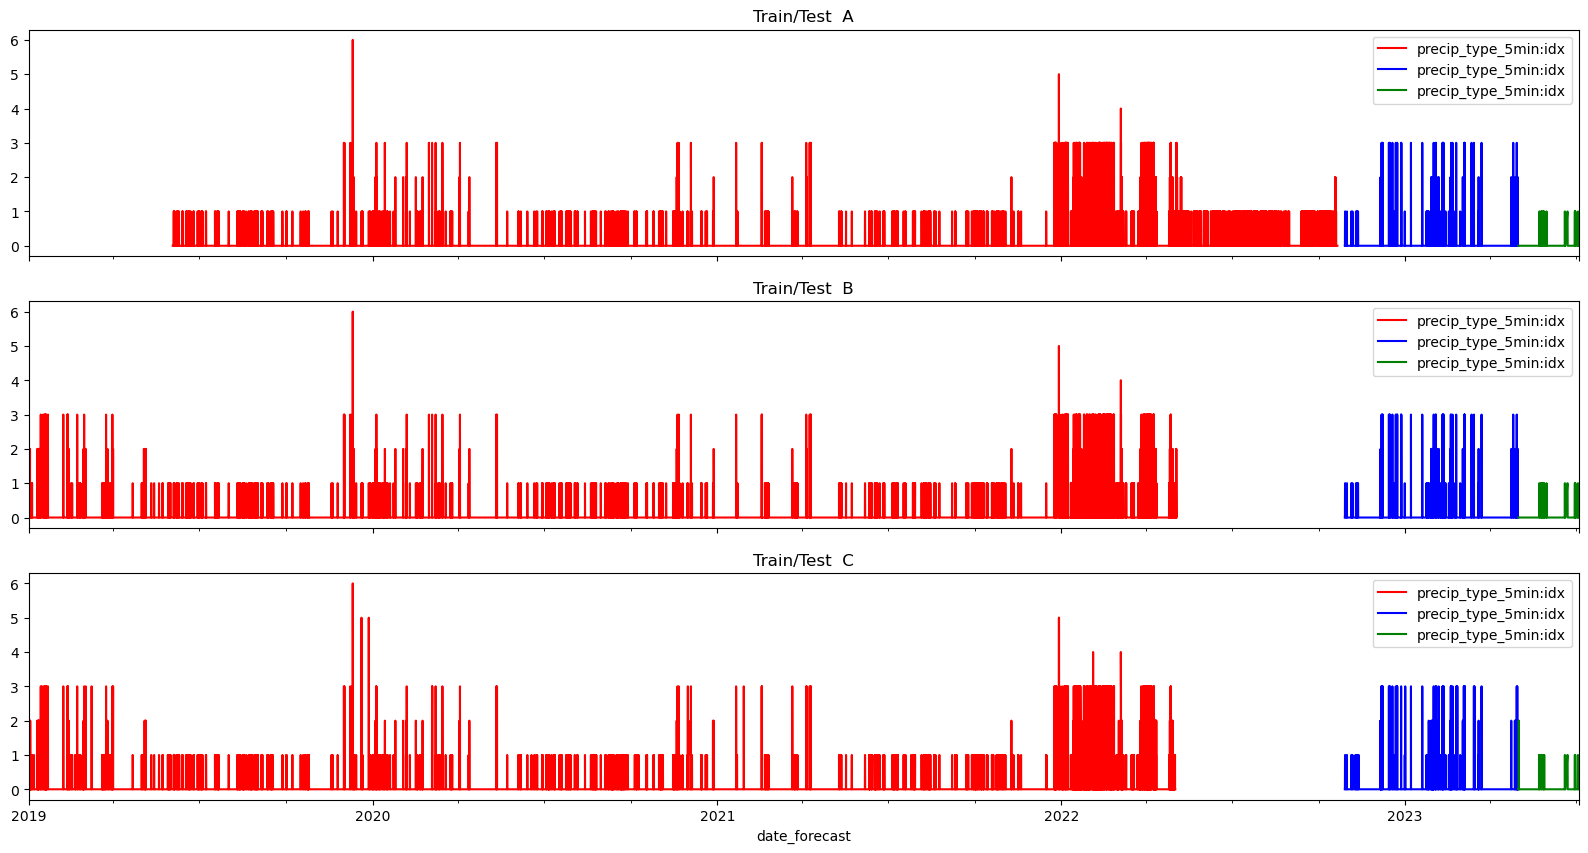

In [368]:
# Plotting a single feature
feature_name = 'precip_type_5min:idx'

fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


In [9]:
test = pd.read_csv('test.csv')
test

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0,A
1,1,2023-05-01 01:00:00,0,A
2,2,2023-05-01 02:00:00,0,A
3,3,2023-05-01 03:00:00,0,A
4,4,2023-05-01 04:00:00,0,A
...,...,...,...,...
2155,2155,2023-07-03 19:00:00,0,C
2156,2156,2023-07-03 20:00:00,0,C
2157,2157,2023-07-03 21:00:00,0,C
2158,2158,2023-07-03 22:00:00,0,C


In [10]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [11]:
# Example, let the predictions be random values
test['prediction'] = np.random.rand(len(test))
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

In [7]:
#!pip install ydata-profiling
#!conda install -c conda-forge ydata-profiling
from ydata_profiling import ProfileReport

/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
profile = ProfileReport(X_test_estimated_c, title = "Profiling Report")
profile.to_file("EDA_test_estimated_c.html")

Export report to file: 100%|██████████████████████| 1/1 [00:00<00:00,  4.59it/s]


In [58]:
X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).corr()['effective_cloud_cover:p']
#X_train_observed_a.drop(['date_forecast'], axis = 1).corr()
#X_test_estimated_a.drop(['date_calc','date_forecast'], axis = 1).corr()

matrix_corr = X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).corr()
correlated_variables = {}
for key_1 in X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).keys():
    for key_2 in X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).keys():
        if  abs(matrix_corr[key_1][key_2]) > 0.9 and abs(matrix_corr[key_1][key_2]) != 1: 
            correlated_variables[(key_1, key_2)] = matrix_corr[key_1][key_2]
print(correlated_variables)

{('absolute_humidity_2m:gm3', 'dew_point_2m:K'): 0.9825923925578672, ('clear_sky_energy_1h:J', 'clear_sky_rad:W'): 0.9905489999326903, ('clear_sky_energy_1h:J', 'diffuse_rad:W'): 0.9045849649349028, ('clear_sky_energy_1h:J', 'diffuse_rad_1h:J'): 0.9175394751229402, ('clear_sky_rad:W', 'clear_sky_energy_1h:J'): 0.9905489999326903, ('clear_sky_rad:W', 'diffuse_rad:W'): 0.9139565352014161, ('clear_sky_rad:W', 'diffuse_rad_1h:J'): 0.9096551329627153, ('dew_point_2m:K', 'absolute_humidity_2m:gm3'): 0.9825923925578672, ('dew_point_2m:K', 't_1000hPa:K'): 0.9002278702322717, ('diffuse_rad:W', 'clear_sky_energy_1h:J'): 0.9045849649349028, ('diffuse_rad:W', 'clear_sky_rad:W'): 0.9139565352014161, ('diffuse_rad:W', 'diffuse_rad_1h:J'): 0.9866227765332353, ('diffuse_rad_1h:J', 'clear_sky_energy_1h:J'): 0.9175394751229402, ('diffuse_rad_1h:J', 'clear_sky_rad:W'): 0.9096551329627153, ('diffuse_rad_1h:J', 'diffuse_rad:W'): 0.9866227765332353, ('direct_rad:W', 'direct_rad_1h:J'): 0.9875649117141303, (

# Pre-processing : 

In [458]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

#Delete features because high correlation between them (>0.9) : 
X_train_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)

X_train_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)

X_train_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)

#Delete because constant values:
X_train_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)


In [459]:
#We match the sizes of X and Y 
#We keep the measurements from every hour only 
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]

X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

#We put the dates as the indexes of the data, and we remove some dates that are not in the corresponding y data.
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)

X_train_estimated_a_matched = X_train_estimated_a.loc[intersection_index_estimated_a]
train_a_estimated_matched = train_a.loc[intersection_index_estimated_a]
X_train_observed_a_matched = X_train_observed_a.loc[intersection_index_observed_a]
train_a_observed_matched = train_a.loc[intersection_index_observed_a]

X_train_estimated_b_matched = X_train_estimated_b.loc[intersection_index_estimated_b]
train_b_estimated_matched = train_b.loc[intersection_index_estimated_b]
X_train_observed_b_matched = X_train_observed_b.loc[intersection_index_observed_b]
train_b_observed_matched = train_b.loc[intersection_index_observed_b]

X_train_estimated_c_matched = X_train_estimated_c.loc[intersection_index_estimated_c]
train_c_estimated_matched = train_c.loc[intersection_index_estimated_c]
X_train_observed_c_matched = X_train_observed_c.loc[intersection_index_observed_c]
train_c_observed_matched = train_c.loc[intersection_index_observed_c]

In [460]:
#One Hot encoding 
from sklearn.preprocessing import OneHotEncoder

idx = ['dew_or_rime:idx',\
       'is_day:idx', 
       'is_in_shadow:idx',
       'precip_type_5min:idx',]

for id in idx:
    concatenated_df = pd.concat([X_train_observed_a_matched[id], X_train_estimated_a_matched[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    X_train_observed_a_matched = pd.concat([X_train_observed_a_matched, df_observed_encoded], axis =1)
    X_train_estimated_a_matched = pd.concat([X_train_estimated_a_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    X_train_observed_a_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_a_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_b_matched[id], X_train_estimated_b_matched[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    X_train_observed_b_matched = pd.concat([X_train_observed_b_matched, df_observed_encoded], axis =1)
    X_train_estimated_b_matched = pd.concat([X_train_estimated_b_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    X_train_observed_b_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_b_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)
    
for id in idx:
    concatenated_df = pd.concat([X_train_observed_c_matched[id], X_train_estimated_c_matched[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    X_train_observed_c_matched = pd.concat([X_train_observed_c_matched, df_observed_encoded], axis =1)
    X_train_estimated_c_matched = pd.concat([X_train_estimated_c_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    X_train_observed_c_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_c_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)


In [461]:
# We modify Y to have a binary classification : 0 = no production of electricity
train_a_estimated_binary = pd.DataFrame({'pv_measurement' : train_a_estimated_matched['pv_measurement']})
train_a_observed_binary = pd.DataFrame({'pv_measurement' : train_a_observed_matched['pv_measurement']})

train_b_estimated_binary = pd.DataFrame({'pv_measurement' : train_b_estimated_matched['pv_measurement']})
train_b_observed_binary = pd.DataFrame({'pv_measurement' : train_b_observed_matched['pv_measurement']})

train_c_estimated_binary = pd.DataFrame({'pv_measurement' : train_c_estimated_matched['pv_measurement']})
train_c_observed_binary = pd.DataFrame({'pv_measurement' : train_c_observed_matched['pv_measurement']})

for time in train_a_estimated_binary.index:
    if train_a_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_a_estimated_binary.loc[time] = 1

for time in train_a_observed_binary.index:
    if train_a_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_a_observed_binary.loc[time] = 1  
        
for time in train_b_estimated_binary.index:
    if train_b_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_b_estimated_binary.loc[time] = 1

for time in train_b_observed_binary.index:
    if train_b_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_b_observed_binary.loc[time] = 1 
        
for time in train_c_estimated_binary.index:
    if train_c_estimated_binary.loc[time]['pv_measurement'] > 0 :
        train_c_estimated_binary.loc[time] = 1

for time in train_c_observed_binary.index:
    if train_c_observed_binary.loc[time]['pv_measurement'] > 0 :
        train_c_observed_binary.loc[time] = 1 
        
train_c_estimated_binary

,pv_measurement
2022-10-28 22:00:00,-0.0
2022-10-28 23:00:00,-0.0
2022-10-29 00:00:00,0.0
2022-10-29 01:00:00,0.0
2022-10-29 02:00:00,0.0
...,...
2023-04-30 19:00:00,1.0
2023-04-30 20:00:00,1.0
2023-04-30 21:00:00,0.0
2023-04-30 22:00:00,-0.0


In [462]:
#Missing values
X_train_estimated_a_final = X_train_estimated_a_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_a_matched['cloud_base_agl:m'].mean()})

X_train_observed_a_final = X_train_observed_a_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_a_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_a_matched['cloud_base_agl:m'].mean()})

X_train_estimated_b_final = X_train_estimated_b_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_b_matched['cloud_base_agl:m'].mean()})

X_train_observed_b_final = X_train_observed_b_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_b_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_b_matched['cloud_base_agl:m'].mean()})

X_train_estimated_c_final = X_train_estimated_c_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_estimated_c_matched['cloud_base_agl:m'].mean()})

X_train_observed_c_final = X_train_observed_c_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_c_matched['ceiling_height_agl:m'].mean(),
                'cloud_base_agl:m' : X_train_observed_c_matched['cloud_base_agl:m'].mean()})

In [463]:
#Normalisation 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a_scaled = scaler.fit_transform(X_train_estimated_a_final)
X_train_observed_a_scaled = scaler.fit_transform(X_train_observed_a_final)

X_train_estimated_b_scaled = scaler.fit_transform(X_train_estimated_b_final)
X_train_observed_b_scaled = scaler.fit_transform(X_train_observed_b_final)

X_train_estimated_c_scaled = scaler.fit_transform(X_train_estimated_c_final)
X_train_observed_c_scaled = scaler.fit_transform(X_train_observed_c_final)

In [464]:
train_a_total_binary = pd.concat([train_a_observed_binary, train_a_estimated_binary], axis = 0)
y_total_a = train_a_total_binary.to_numpy().ravel()
train_b_total_binary = pd.concat([train_b_observed_binary, train_b_estimated_binary], axis = 0)
y_total_b = train_b_total_binary.to_numpy().ravel()
train_c_total_binary = pd.concat([train_c_observed_binary, train_c_estimated_binary], axis = 0)
y_total_c = train_c_total_binary.to_numpy().ravel()

y_observed_a_binary = train_a_observed_binary.to_numpy().ravel()
y_observed_b_binary = train_b_observed_binary.to_numpy().ravel()
y_observed_c_binary = train_c_observed_binary.to_numpy().ravel()

y_estimated_a_binary = train_a_estimated_binary.to_numpy().ravel()
y_estimated_b_binary = train_b_estimated_binary.to_numpy().ravel()
y_estimated_c_binary = train_c_estimated_binary.to_numpy().ravel()

X_train_total_a = np.concatenate((X_train_observed_a_scaled, X_train_estimated_a_scaled), axis = 0)
X_train_total_b = np.concatenate((X_train_observed_b_scaled, X_train_estimated_b_scaled), axis = 0)
X_train_total_c = np.concatenate((X_train_observed_c_scaled, X_train_estimated_c_scaled), axis = 0)

In [423]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train_total_a ,y_total_a, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8856947296372347
Precision: 0.892831541218638
Recall: 0.870979020979021
F1 score: 0.8817699115044247


/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [451]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer

# Supposons que X_train_observed_b_scaled et y_observed soient vos données
X = X_train_total_c
y = y_total_c

# Créer un modèle
model = LogisticRegression()

# Définir les métriques que vous souhaitez évaluer
scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

# Utiliser StratifiedKFold pour prendre en compte la distribution des classes lors de la division
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Effectuer la validation croisée
scores = cross_val_score(model, X, y, cv=cv, scoring=make_scorer(f1_score))

# Afficher les scores pour chaque pli
for i, score in enumerate(scores, 1):
    print(f'Fold {i} - Accuracy: {score}')

# Afficher la moyenne des scores
print(f'Mean Accuracy: {scores.mean()}')


/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/lin

Fold 1 - Accuracy: 0.9259620068192889
Fold 2 - Accuracy: 0.924114671163575
Fold 3 - Accuracy: 0.9211356466876972
Fold 4 - Accuracy: 0.9257641921397379
Fold 5 - Accuracy: 0.9111595255386105
Mean Accuracy: 0.9216272084697819


/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [417]:
from sklearn import linear_model
logr = linear_model.LogisticRegression()
logr.fit(X_train_observed_b_scaled, y_observed)
predicted = logr.predict(X_train_estimated_b_scaled)
logr.score(X_train_estimated_b_scaled, train_b_estimated_binary)

/Applications/anaconda3/envs/tdt4173/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9341849486253818

# Comparaison de modèles : 

In [465]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
#from lightgbm import LGBMRegressor

In [476]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))
          ]

In [477]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_a_scaled, train_a_observed_matched.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_a_scaled)
    y_test = train_a_estimated_matched.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 539.4592220048379
MAE for Ridge = 489.32156497002086
MAE for Lasso = 227.21642808770935
MAE for ElasticNet = 412.8985648703977
MAE for CART = 230.8461902594447
MAE for RF = 164.81979827036872
MAE for SVR = 225.51185904442323
MAE for GBM = 157.38628340401323
MAE for XGBoost = 183.0103655857393


In [478]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_b_scaled, train_b_observed_matched.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_b_scaled)
    y_test = train_b_estimated_matched.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 42.21697040542013
MAE for Ridge = 41.43307423094957
MAE for Lasso = 34.338877987233616
MAE for ElasticNet = 74.03276472438515
MAE for CART = 56.74045977271237
MAE for RF = 47.2475400392849
MAE for SVR = 27.09086495124439
MAE for GBM = 32.675516021495454
MAE for XGBoost = 41.39100809571247


In [479]:
from sklearn.metrics import mean_absolute_error as mae
for name, regressor in models:
    regressor.fit(X_train_observed_c_scaled, train_c_observed_matched.to_numpy().ravel())
    y_pred = regressor.predict(X_train_estimated_c_scaled)
    y_test = train_c_estimated_matched.to_numpy().ravel()
    error = mae(y_test, y_pred)
    print('MAE for {reg} = {score_mae}'.format(reg=name, score_mae=str(error)))

MAE for LR = 42.47137891322842
MAE for Ridge = 42.206948278850255
MAE for Lasso = 31.70976934147288
MAE for ElasticNet = 54.996592107779335
MAE for CART = 40.092257110352676
MAE for RF = 33.46575130830489
MAE for SVR = 24.31443638640415
MAE for GBM = 34.16352378662542
MAE for XGBoost = 34.25450198899329
